In [249]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score


import warnings
warnings.filterwarnings('ignore')

In [250]:
#Loading the dataset
df = pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Our target column is Next_Tmax and Next_Tmin are in continous in nature, we will solve by Regression.

In [251]:
df.shape

(7752, 25)

In this data set 7752 rows and 25 columns.

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [253]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [254]:
df.drop(columns =['lat','lon'],inplace = True)

In [255]:
for col in df.columns:
    if col not in ['station','Date']:
        df[col] = df[col].replace(np.nan,df[col].median())
        


In [256]:
df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [257]:
df['station'] = df['station'].fillna(df['station'].mode()[0])
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])

In [258]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [259]:
df['Date'] = pd.to_datetime(df['Date'])

In [260]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112682,0.131947,-0.066776,-0.166359,0.069306,0.105004,0.004231,-0.133770,0.006725,...,0.005801,-0.005203,-0.010771,-0.015291,-0.013277,-0.256138,-0.090461,-0.018814,0.108154,0.128582
Present_Tmax,0.112682,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,...,-0.142549,-0.111148,-0.101362,-0.122051,-0.101118,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.131947,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,...,-0.047496,0.109085,0.064851,-0.049017,-0.065550,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.066776,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,...,0.514163,0.262875,0.391110,0.240831,0.168797,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.166359,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,...,0.130008,0.267698,0.228398,0.134087,0.117376,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.069306,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,...,-0.429456,-0.111105,-0.242113,-0.188133,-0.160300,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.105004,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,...,-0.080587,0.037727,0.000588,-0.088791,-0.094855,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,0.004231,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,...,0.221066,0.153213,0.192427,0.162173,0.144550,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,-0.133770,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,...,-0.172222,-0.012042,-0.077061,0.016483,0.020332,0.055126,0.086770,-0.046553,0.155684,-0.056832
LDAPS_CC1,0.006725,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,...,0.361386,0.446635,0.389771,0.169130,0.092119,-0.014087,-0.020747,0.219264,-0.454771,-0.012732


<AxesSubplot:>

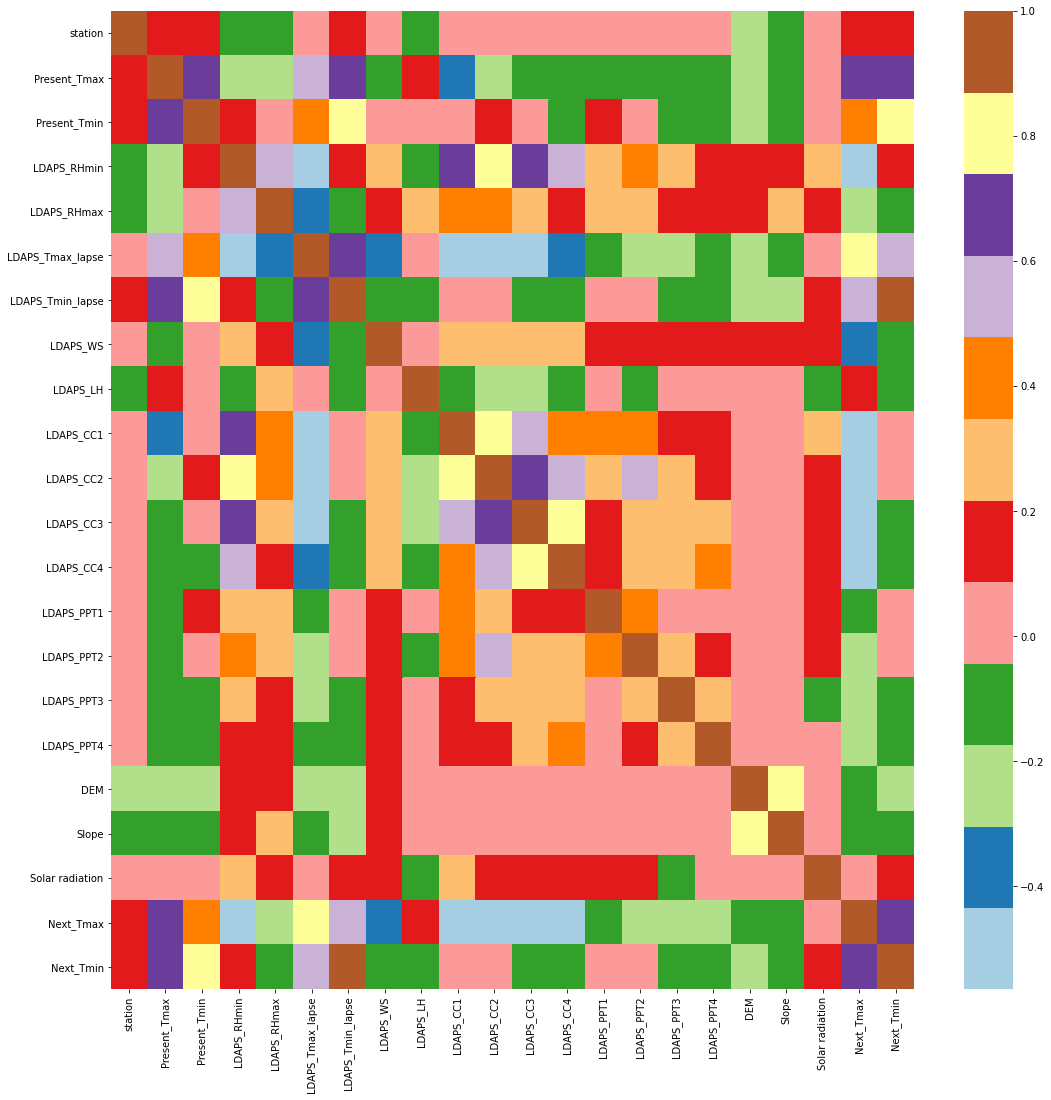

In [261]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),cmap='Paired')

In [262]:
df.skew()

station             0.000100
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

station                 AxesSubplot(0.125,0.71587;0.065678x0.16413)
Present_Tmax         AxesSubplot(0.203814,0.71587;0.065678x0.16413)
Present_Tmin         AxesSubplot(0.282627,0.71587;0.065678x0.16413)
LDAPS_RHmin          AxesSubplot(0.361441,0.71587;0.065678x0.16413)
LDAPS_RHmax          AxesSubplot(0.440254,0.71587;0.065678x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.519068,0.71587;0.065678x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.597881,0.71587;0.065678x0.16413)
LDAPS_WS             AxesSubplot(0.676695,0.71587;0.065678x0.16413)
LDAPS_LH             AxesSubplot(0.755508,0.71587;0.065678x0.16413)
LDAPS_CC1            AxesSubplot(0.834322,0.71587;0.065678x0.16413)
LDAPS_CC2              AxesSubplot(0.125,0.518913;0.065678x0.16413)
LDAPS_CC3           AxesSubplot(0.203814,0.518913;0.065678x0.16413)
LDAPS_CC4           AxesSubplot(0.282627,0.518913;0.065678x0.16413)
LDAPS_PPT1          AxesSubplot(0.361441,0.518913;0.065678x0.16413)
LDAPS_PPT2          AxesSubplot(0.440254,0.51891

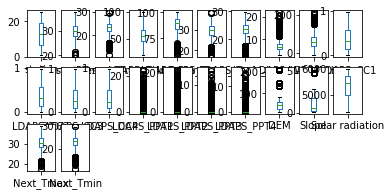

In [263]:
df.plot(kind='box',subplots=True,layout=(4,10))

In [264]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score<3).all(axis=1)
df =df[filtering_entry]
#df.reset_index(inplace = True)

In [265]:
# view some statistics
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,...,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000
mean,13.002264,29.822736,23.318993,56.686546,88.513146,29.736801,23.622548,6.947234,62.206025,0.365505,...,0.296656,0.585165,0.472649,0.257488,0.258420,60.869249,1.232447,5346.799263,30.410549,23.044552
std,7.198298,2.888252,2.307721,14.376867,6.877133,2.814728,2.204030,1.875797,33.294836,0.260620,...,0.250816,1.925543,1.740604,1.112429,1.187259,53.367271,1.348312,421.481857,3.013670,2.366969
min,1.000000,21.200000,16.100000,19.794666,66.989464,20.881492,16.558304,2.882580,-8.569043,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.370000,0.098500,4371.684570,20.700000,13.300000
25%,7.000000,27.900000,21.800000,46.223341,84.443361,27.818696,22.215771,5.675279,37.565474,0.147035,...,0.083244,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300,5016.055176,28.400000,21.500000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.768551,23.795410,6.531844,56.865482,0.315508,...,0.227664,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000,5435.520020,30.600000,23.200000
75%,19.000000,32.000000,24.900000,66.811426,93.698986,31.740174,25.170575,7.876819,83.578492,0.563804,...,0.491542,0.044339,0.014397,0.006566,0.000000,59.832400,1.767800,5727.288086,32.700000,24.600000
max,25.000000,37.600000,29.900000,97.482574,100.000153,38.140534,29.619342,13.604829,213.414006,0.967277,...,0.974710,23.701544,21.621661,15.841235,16.655469,212.335000,5.178200,5992.895996,38.900000,29.800000


In [266]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))

In [267]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,12.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,12.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,12.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,12.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,12.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5


In [268]:
x = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y = df[['Next_Tmax','Next_Tmin']]

In [269]:
for index in x.skew().index:
    if x.skew().loc[index] > 0.5:
        x[index] = np.cbrt(x[index])
        if x.skew().loc[index] <-0.5:
            x[index] = np.square(x[index])

In [270]:
x.skew()

station             0.007782
Date                0.011636
Present_Tmax       -0.230063
Present_Tmin       -0.217252
LDAPS_RHmin         0.286785
LDAPS_RHmax        -0.755610
LDAPS_Tmax_lapse   -0.098432
LDAPS_Tmin_lapse   -0.384715
LDAPS_WS            0.574715
LDAPS_LH           -0.280014
LDAPS_CC1           0.487881
LDAPS_CC2           0.477352
LDAPS_CC3           0.195367
LDAPS_CC4          -0.450584
LDAPS_PPT1          1.990867
LDAPS_PPT2          2.322561
LDAPS_PPT3          2.643657
LDAPS_PPT4          2.959830
DEM                 0.942358
Slope               0.627590
Solar radiation    -0.503397
dtype: float64

In [271]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [272]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [274]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [275]:
vif_calc()

    VIF Factor          features
0     4.880061           station
1     4.347009              Date
2   275.400247      Present_Tmax
3   308.655728      Present_Tmin
4   105.310080       LDAPS_RHmin
5   254.334525       LDAPS_RHmax
6   692.811172  LDAPS_Tmax_lapse
7   763.007151  LDAPS_Tmin_lapse
8   132.074324          LDAPS_WS
9    40.720077          LDAPS_LH
10   14.189591         LDAPS_CC1
11   17.592678         LDAPS_CC2
12   19.222136         LDAPS_CC3
13   20.165858         LDAPS_CC4
14    3.171488        LDAPS_PPT1
15    2.987619        LDAPS_PPT2
16    2.122704        LDAPS_PPT3
17    1.930285        LDAPS_PPT4
18   46.712611               DEM
19   22.551822             Slope
20  193.710851   Solar radiation


In [276]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [277]:
lm.score(x_train,y_train)

0.7790688374348593

In [278]:
lm.coef_

array([[ 0.17310878,  0.1232731 ,  0.48159192,  0.1151854 ,  0.4171943 ,
        -0.03504149,  1.74822819,  0.14998148, -0.24485019,  0.24649352,
        -0.23177364, -0.1676077 , -0.28854378, -0.23802331, -0.08274965,
         0.12603   , -0.11128228, -0.01948272, -0.08497964,  0.0813024 ,
         0.02698392],
       [ 0.02108015,  0.05367745,  0.15460172,  0.55665175,  0.25494244,
         0.06448439,  0.22420483,  1.33968418,  0.11866479,  0.05721868,
        -0.03984582,  0.12825006, -0.08476741,  0.04649201, -0.09268424,
        -0.13968404,  0.01707812, -0.13076563, -0.34848268,  0.2144815 ,
        -0.01217601]])

In [279]:
lm.intercept_

array([30.41081231, 23.05234498])

In [280]:
pred=lm.predict(x_test)

In [281]:
print('Predicted value and actual value',pred,y_test)

Predicted value and actual value [[30.53388934 19.8649162 ]
 [31.88720612 23.67769265]
 [26.75094395 20.78450433]
 ...
 [33.70522132 24.89610607]
 [28.61907654 23.05825855]
 [28.75877439 19.10294973]]       Next_Tmax  Next_Tmin
4580       29.9       20.1
6630       31.7       23.7
4813       29.0       20.1
1074       34.2       27.1
4940       29.7       21.2
...         ...        ...
4217       33.2       23.7
7377       28.1       20.9
2321       33.9       24.8
2898       29.9       23.4
3140       27.9       18.6

[1502 rows x 2 columns]


In [282]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

1.6544994898740473


In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [284]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls= Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [285]:
ls= Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls =ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.7854864642732158

In [289]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [291]:
rf=RandomForestRegressor(criterion= 'mse', max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs= r2_score(y_test,pred_decision)
print('R2_score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2_score: 90.6777824664919
Cross Val Score: 69.82698673469751


Our best model is Random Forest Regressor.

In [292]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor

import pickle
with open('Temperature Forecast_pickle','wb') as f:
    pickle.dump(rf,f)

In [293]:
with open('Temperature Forecast_pickle','rb') as f:
    mp = pickle.load(f)

In [ ]:
loaded_model = pickle.load(open('Temperature Forecast_pickle','rb'))
result = loaded_model.score(x_test,y_test)
print(result)